[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



🔹 **Fake News Samples:**

👉 

--------------------------------------------------------------------------------
👉 The Senate voted 51-48 this afternoon to proceed to the resolution, S

👉 Con

👉 Res

👉 3, which would set up a filibuster-proof process, ensuring the chamber s consideration of legislation repealing parts of Obamacare and replacing it, either as one bill or as separate measures.The 54-page document, unveiled yesterday by Budget Chairman Mike Enzi, directs committees of jurisdiction to come up with Affordable Care Act legislation by Jan

👉 27, meaning a repeal bill could be to Donald Trump s desk by the end February, lawmakers said today.The House Ways and Means and Energy and Commerce as well as the Senate Finance and Health, Education, Labor, and Pensions committees are charged with drafting the legislation.Senate action came as Obama and Pence both headed to the Capitol to meet with their respective parties to discuss efforts to preserve or undo the health-care law

👉 Hou

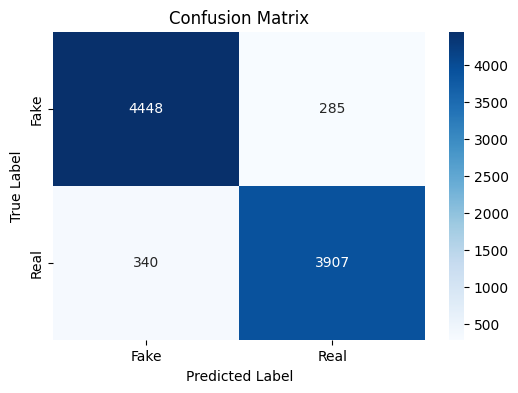

<ipython-input-3-46969f347be0>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


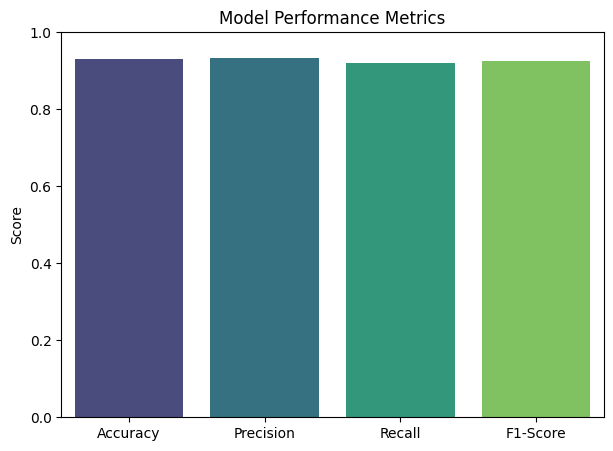

Textarea(value='', layout=Layout(height='100px', width='80%'), placeholder='Enter news article here...')

Button(description='Check News', style=ButtonStyle())

Output()

In [3]:
!pip install joblib scikit-learn matplotlib seaborn

# Import necessary libraries
import pandas as pd
import re
import nltk
import joblib
import random
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load datasets
fake_df = pd.read_csv("/content/Fake.csv")
true_df = pd.read_csv("/content/True.csv")

# Assign labels
fake_df['label'] = 'fake'
true_df['label'] = 'real'

# Merge datasets
df = pd.concat([fake_df, true_df], ignore_index=True)

# Preprocessing Function
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

df['clean_text'] = df['text'].apply(preprocess_text)

# Show some sample news (each sentence on a new line)
def display_sample_news(news_samples, label):
    print(f"\n🔹 **{label} News Samples:**\n")
    for news in news_samples:
        sentences = news.split('. ')
        for sentence in sentences:
            print(f"👉 {sentence.strip()}\n")
        print("-" * 80)  # Separator between articles

# Display 3 Fake and 3 Real News Samples
display_sample_news(fake_df['text'].sample(3, random_state=42).values, "Fake")
display_sample_news(true_df['text'].sample(3, random_state=42).values, "Real")

# Split Data
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

# Create Model Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', MultinomialNB())
])

# Train Model
pipeline.fit(X_train, y_train)

# Save the trained model
joblib.dump(pipeline, 'fake_news_model.pkl')

# Evaluate Model
y_pred = pipeline.predict(X_test)

# Print Accuracy & Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.2f}")
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Performance Bar Chart
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values = [
    accuracy,
    classification_report(y_test, y_pred, output_dict=True)['real']['precision'],
    classification_report(y_test, y_pred, output_dict=True)['real']['recall'],
    classification_report(y_test, y_pred, output_dict=True)['real']['f1-score']
]

plt.figure(figsize=(7, 5))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")
plt.show()

# Load the model (for testing)
model = joblib.load('fake_news_model.pkl')

# Function to predict news type
def predict_news(news_text):
    processed_text = preprocess_text(news_text)
    prediction = model.predict([processed_text])[0]
    return "Fake News ❌" if prediction == "fake" else "Real News ✅"

# Interactive Input in Colab
from IPython.display import display
import ipywidgets as widgets

text_input = widgets.Textarea(
    placeholder="Enter news article here...",
    layout=widgets.Layout(width="80%", height="100px")
)

button = widgets.Button(description="Check News")
output = widgets.Output()

def on_button_click(b):
    with output:
        output.clear_output()
        result = predict_news(text_input.value)
        display(result)

button.on_click(on_button_click)

display(text_input, button, output)


# New Section